In [14]:
import os
from IPython.display import display

# ROOT contais the project directory 
os.chdir(os.path.dirname(os.getcwd()))

In [22]:
import torch
import PIL
import numpy as np
from PIL import Image
from tqdm import tqdm
from src.nearest_neighbor_mean import nearest_neighbour_mean as nnm

In [23]:
ricardo = [[240, 128, 128], [70, 130, 180], [135, 206, 235]]
gerzon =  [[61, 255, 255], [0, 130, 255], [220, 220, 220]]
miguel =  [[159, 100, 227], [105, 224, 240], [93, 240, 118]]

rgm = np.array([ricardo, gerzon, miguel]).astype(np.uint8)

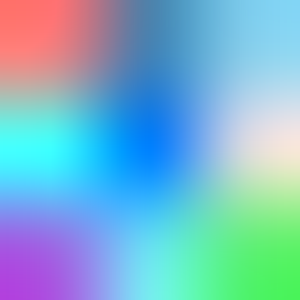

In [28]:
Image.fromarray(rgm).resize((300,300))

100%|██████████| 3/3 [00:00<00:00, 1857.26it/s]


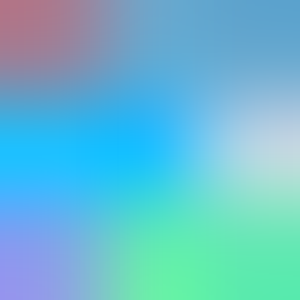

In [29]:
im_nnm = nnm(rgm)
Image.fromarray(im_nnm.to("cpu").numpy().astype(np.uint8)).resize((300,300))

100%|██████████| 3/3 [00:00<00:00, 2409.13it/s]


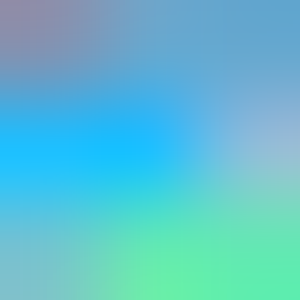

In [27]:
im_nnm2 = nnm(im_nnm.type(torch.float16))
Image.fromarray(im_nnm2.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2722.40it/s]


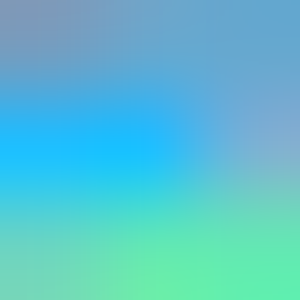

In [30]:
im_nnm3 = nnm(im_nnm2.type(torch.float16))
Image.fromarray(im_nnm3.to("cpu").numpy().astype(np.uint8)).resize((300, 300))